<h6>Import the librairies</h6>

In [1]:
# Import librairies 
import os
import csv
from itertools import count
#Analyse and structure our corpus
import pandas as pd
import numpy as np
#Do some viz
import matplotlib.pyplot as plt
import glob
# Series to count the number of each expression in the dataset
from pandas import Series
import spacy

#Import the spacy nlp en and fr models as object
nlp = spacy.load('en_core_web_sm')
nlp_fr = spacy.load('fr_core_news_sm')

<h6> 1. Read the dataframe : 2_to_10_revised_dataset </br>
</h6>

In [2]:
# Read the corpus revised in data_revision
df = pd.read_csv('DATASET_2_10_revised',encoding='utf8',sep='\t',header=None,
                 names=['en_epl','fr_epl'])

In [3]:
df.describe()

en_epl  \
count                                               76380   
unique                                              68377   
top     France Laboratoires Merck Sharp & Dohme – Chib...   
freq                                                    5   

                                    fr_epl  
count                                76380  
unique                               69037  
top     Neuropathie motrice périphérique G  
freq                                     5

In [4]:
noticed_characters = ['(',')','…','[',']',';',"–"]
df['en_epl'] = df['en_epl'].apply(lambda x: ' '.join([word for word in x.split() if word not in (noticed_characters)]))
# iterate on each token in the rows within a lambda x 
df['fr_epl'] = df.fr_epl.apply(lambda x:' '.join([word for word in x.split() if word not in (noticed_characters)]))

In [5]:
df.describe()

en_epl                              fr_epl
count                            76380                               76380
unique                           68374                               69037
top     PHARMACEUTICAL FORM once a day  Neuropathie motrice périphérique G
freq                                 5                                   5

<h6> 2. Apply the spacy NLP ibjects on a sample of the dataset Trigrams and Fourgrams </br>
</h6>

In [7]:
trigram_querry_expressions_df = df[df['en_epl'].str.split().str.len().eq(3)]

In [8]:
trigram_querry_expressions_df.describe()

en_epl          fr_epl
count                     8494            8494
unique                    7475            8110
top     Fluid retention severe  Espèces cibles
freq                         5               4

In [9]:
"""Apply spacy NLP() on a sample of the dataframe"""

'Apply spacy NLP() on a sample of the dataframe'

<h6>3. Select a dataframe (Trigram in this case) and annotate its expressions using spaacy's NLP models (English and French) </h6>

In [10]:
df_to_annotate = df.sample(n = 500, random_state=42)

<h6>3.1. Annotation function with spacy NLP models OBJECTS </h6>

In [11]:
#List of catogories to be returned
keep_pos = ('PROPN', 'NOUN','VERB','ADJ','ADP','AUX','ADV','DET','CONJ','PRON',
                'PRO','SCONJ','DET','ART','VBG','WRB','ADV','CCONJ','PRON','PUNCT')
#The function that annotate expressions
def categorize_en_tokens(text):
    #annotate each token in the objet (text) with POS in the keep_pos listeabove
    return [(tok.text, tok.pos_) for tok in nlp(text) if tok.pos_ in keep_pos]

#Create a new column- Match the POS features for the EN expressions 
def match_patterns(text):
    return ' '.join([tok.pos_ for tok in nlp(text) if tok.pos_ in keep_pos])
# Apply the functions on the Df attributes
trigram_querry_expressions_df['en_POS'] = trigram_querry_expressions_df['en_epl'].apply(categorize_en_tokens)
trigram_querry_expressions_df['matched_en_POS'] = trigram_querry_expressions_df['en_epl'].apply(match_patterns)

<ipython-input-11-7c2d40897e5a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trigram_querry_expressions_df['en_POS'] = trigram_querry_expressions_df['en_epl'].apply(categorize_en_tokens)
<ipython-input-11-7c2d40897e5a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trigram_querry_expressions_df['matched_en_POS'] = trigram_querry_expressions_df['en_epl'].apply(match_patterns)


In [12]:
nlp_fr = spacy.load('fr_core_news_sm')
#Liste des catégories grammaticales 
keep_pos_fr = ('PROPN', 'NOUN','VERB','ADJ','ADP','AUX','ADV','DET','CONJ','NUM',
                'PRO','SCONJ','DET','ART','VBG','WRB','ADV','CCONJ','PRON','PUNCT')
def categorize_fr_tokens(text):
    return [(tok.text, tok.pos_) for tok in nlp_fr(text) if tok.pos_ in (keep_pos_fr)]
def match_patterns(text):
    return ' '.join([tok.pos_ for tok in nlp_fr(text) if tok.pos_ in (keep_pos_fr)])       

trigram_querry_expressions_df['fr_POS'] = trigram_querry_expressions_df['fr_epl'].apply(categorize_fr_tokens)
trigram_querry_expressions_df['matched_fr_POS'] = trigram_querry_expressions_df['fr_epl'].apply(match_patterns)

<ipython-input-12-e8ee48c8335d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trigram_querry_expressions_df['fr_POS'] = trigram_querry_expressions_df['fr_epl'].apply(categorize_fr_tokens)
<ipython-input-12-e8ee48c8335d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trigram_querry_expressions_df['matched_fr_POS'] = trigram_querry_expressions_df['fr_epl'].apply(match_patterns)


In [13]:
df['en_POS'] = df['en_epl'].apply(categorize_en_tokens)
df['matched_en_POS'] = df['en_epl'].apply(match_patterns)
df['fr_POS'] = df['fr_epl'].apply(categorize_fr_tokens)
df['matched_fr_POS'] = df['fr_epl'].apply(match_patterns)

<h6>3.. The 10 frequent expressions and their POS Patterns</h6>

In [14]:
import matplotlib.pyplot as plt
import pandas
fig, ax = plt.subplots()
df['matched_en_POS'].value_counts()[:10].plot(ax=ax, kind='bar')

<AxesSubplot:>

In [15]:
# 20 Frequent POS patterns 
fig, ax = plt.subplots()
df['matched_fr_POS'].value_counts()[:20].plot(ax=ax, kind='bar')

<AxesSubplot:>

<h6>Select a dataframe (Trigram in this case) and annotate its expressions"""

In [16]:
# Create two tables for expression and its matched pattern for each language
en_EPL_patterns = trigram_querry_expressions_df[['en_epl','matched_en_POS']]
fr_EPL_patterns =  trigram_querry_expressions_df[['fr_epl','matched_fr_POS']]

<h6>Dans cette partie:<br> <br>Le score de corrélation généré est de 1; ce qui montre que les expressions en-fr sont très bien aligné.<br>
    <br> Visualize some expressions and its POS features<br>
    <br> We note that the dataset is full of named entities <br><h6>

In [17]:
en_EPL_patterns.describe()

en_epl     matched_en_POS
count                     8494               8494
unique                    7475                541
top     Fluid retention severe  PROPN PROPN PROPN
freq                         5                902

In [18]:
fr_EPL_patterns.describe()

fr_epl matched_fr_POS
count             8494           8494
unique            8110           2551
top     Espèces cibles  NOUN NUM NOUN
freq                 4            302

In [19]:
en_EPL_patterns.tail()

en_epl        matched_en_POS
76311        Fat Liver Kidney     PROPN PROPN PROPN
76315                L5 of 09             PROPN ADP
76324            For the user          ADP DET NOUN
76326         What is Zubrin?  PRON AUX PROPN PUNCT
76366  Magyarország Alkotas u      PROPN PROPN NOUN

In [20]:
en_EPL_patterns.tail()

en_epl        matched_en_POS
76311        Fat Liver Kidney     PROPN PROPN PROPN
76315                L5 of 09             PROPN ADP
76324            For the user          ADP DET NOUN
76326         What is Zubrin?  PRON AUX PROPN PUNCT
76366  Magyarország Alkotas u      PROPN PROPN NOUN

<h6>Among 1900 expressions, the dataset in general, this sample is full of :<br> <br>Named Entities PROPN 245 <br> Noun phrases NOUN/ADJ 192
 <h6>

In [21]:
fr_EPL_patterns.describe()

fr_epl matched_fr_POS
count             8494           8494
unique            8110           2551
top     Espèces cibles  NOUN NUM NOUN
freq                 4            302

In [22]:
pd.Series(fr_EPL_patterns.matched_fr_POS).value_counts()[:10]

NOUN NUM NOUN                           302
PROPN NUM NOUN                          234
PROPN PROPN PROPN                       215
NUM NOUN NOUN                           192
PRON PRON AUX PRON PRON PROPN PUNCT     158
NOUN ADP NOUN                           154
NUM NOUN ADJ                            149
PRON VERB PROPN                         119
NOUN ADJ ADJ                            114
PRON PRON AUX PRON SCONJ PROPN PUNCT    110
Name: matched_fr_POS, dtype: int64

In [23]:
pd.Series(fr_EPL_patterns.fr_epl).value_counts()[:10]

Espèces cibles                            4
Poola Polija Lenkija                      4
Rétention hydrique sévère                 4
Omnitrope FORME PHARMACEUTIQUE            4
Méloxicam FORME PHARMACEUTIQUE            4
Traitement à base de dermocorticoïdes§    3
Syndrome de Restauration Immunitaire      3
Poules et canards                         3
Poudre blanche lyophilisée                3
Données de pharmacodynamie clinique       3
Name: fr_epl, dtype: int64

In [24]:
en_EPL_patterns[en_EPL_patterns['matched_en_POS'] == 'PROPN NOUN']

en_epl matched_en_POS
1409                 250 IU solvent     PROPN NOUN
1411                1500 IU solvent     PROPN NOUN
1412                2000 IU solvent     PROPN NOUN
1413                3000 IU solvent     PROPN NOUN
2486   6 PHARMACEUTICAL PARTICULARS     PROPN NOUN
...                             ...            ...
75564              EU 001 QUADRISOL     PROPN NOUN
75821         7 Sorbitan monooleate     PROPN NOUN
75863                 Potency mg ml     PROPN NOUN
75889              Selamectin 30 mg     PROPN NOUN
76051               EU 005 Trocoxil     PROPN NOUN

[210 rows x 2 columns]

In [25]:
import matplotlib.pyplot as plt
import pandas
fig, ax = plt.subplots()
en_EPL_patterns['matched_en_POS'].value_counts()[:10].plot(ax=ax, kind='bar')

<AxesSubplot:>

<AxesSubplot:>

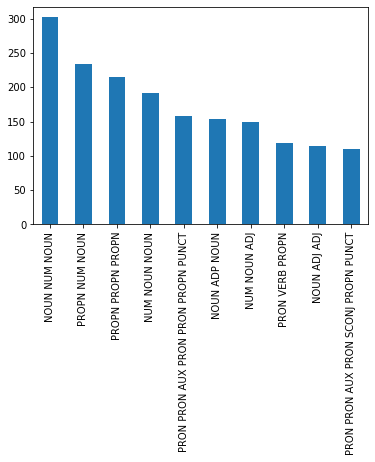

In [26]:
import matplotlib.pyplot as plt
import pandas

# data = load_my_data()
fig, ax = plt.subplots()
fr_EPL_patterns['matched_fr_POS'].value_counts()[:10].plot(ax=ax, kind='bar')

<h6>Check some other expressions, noun phrases and Named Entities with certain part of speech:<br> ADJ ADJ NOUN<br><h6>

In [27]:
en_EPL_patterns[en_EPL_patterns.matched_en_POS == "ADJ ADJ NOUN"]

en_epl matched_en_POS
203         Randomised comparative study   ADJ ADJ NOUN
436                      Painful red eye   ADJ ADJ NOUN
1804            Rash cutaneous reactions   ADJ ADJ NOUN
1813         Other possible interactions   ADJ ADJ NOUN
1959              External genital warts   ADJ ADJ NOUN
...                                  ...            ...
73842       Single intravenous injection   ADJ ADJ NOUN
73865  Chronic musculoskeletal disorders   ADJ ADJ NOUN
74170              Light liquid paraffin   ADJ ADJ NOUN
74326      Single subcutaneous injection   ADJ ADJ NOUN
75576         Twice daily administration   ADJ ADJ NOUN

[207 rows x 2 columns]

In [28]:
fr_EPL_patterns[fr_EPL_patterns.matched_fr_POS == "NOUN ADJ ADJ"]

fr_epl matched_fr_POS
351                        Ελλάδα ΜΕΝΤΙΣΙ ΕΛΛΑΣ   NOUN ADJ ADJ
1247       Affections hépatobiliaires Fréquents   NOUN ADJ ADJ
1959                 Verrues génitales externes   NOUN ADJ ADJ
1993                 Verrues génitales externes   NOUN ADJ ADJ
3178            Contraceptifs oraux oestrogènes   NOUN ADJ ADJ
...                                         ...            ...
73828          Injection intramusculaire unique   NOUN ADJ ADJ
73842            Injection intraveineuse unique   NOUN ADJ ADJ
73865  Troubles musculosquelettiques chroniques   NOUN ADJ ADJ
74029                     Huile Minérale légère   NOUN ADJ ADJ
75628                   Matrice appétente appât   NOUN ADJ ADJ

[114 rows x 2 columns]

<h6> 3. English and French expressions correlation score - 1-<br><br>
    Visualize some expressions with its correlation score with sns.corr() and sns.heatmap() functions<h6>

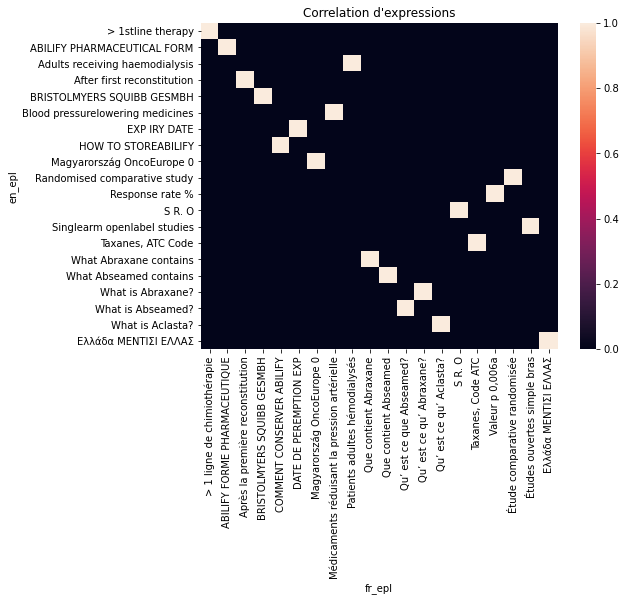

In [29]:
#Sns to visuamlize the french and english expressions 
import seaborn as sns 
# Sample of 100 expressions
pd.set_option('display.max_rows', 20)
pd.options.mode.chained_assignment = None
#Visuamize a sample of 10 expressions
min_df = trigram_querry_expressions_df[10:30]
# Range the index for the expressions in the sample 
min_df.index = pd.RangeIndex(len(min_df.index))
mini_df = min_df

# Figure size
plt.rcParams['figure.figsize']=[8,6]
# Tiltle of the figure
plt.title('Correlation d\'expressions' );
# Heatmap of expressions and their annotations
# sns.heatmap(pd.crosstab(mini_df['en_epl'], mini_df['en_epl']));
sns.heatmap(pd.crosstab(mini_df['en_epl'], mini_df['fr_epl']));

In [30]:
pd.Series(mini_df.matched_fr_POS).value_counts()[:10]

PRON VERB PROPN                              2
PRON PRON AUX PRON PRON PROPN PROPN PUNCT    2
NOUN ADJ VERB                                2
NOUN ADP NOUN NOUN                           1
NOUN ADJ NUM                                 1
ADP DET ADJ NOUN                             1
PRON PRON AUX PRON PRON PROPN PUNCT          1
NOUN ADJ ADJ                                 1
ADV VERB ADJ                                 1
NOUN VERB DET NOUN ADJ                       1
Name: matched_fr_POS, dtype: int64

In [31]:
# mini_df.head()

In [32]:
#Describe a sample of trigram expressions with POS annotations
mini_df.describe()

en_epl                 fr_epl  \
count                             20                     20   
unique                            20                     20   
top     Randomised comparative study  Que contient Abseamed   
freq                               1                      1   

                                             en_POS  matched_en_POS  \
count                                            20              20   
unique                                           20              15   
top     [(EXP, PROPN), (IRY, PROPN), (DATE, PROPN)]  NOUN NOUN NOUN   
freq                                              1               2   

                                                   fr_POS   matched_fr_POS  
count                                                  20               20  
unique                                                 20               17  
top     [(DATE, NOUN), (DE, ADP), (PEREMPTION, NOUN), ...  PRON VERB PROPN  
freq                                                    1                2

<h6> 4. Visualization of some expressions' POS<br><br>
    Exemple d'une expression fréquente (3) and its english and french POS</h6>

In [33]:
# Expression to Part of speech
trigram_querry_expressions_df[trigram_querry_expressions_df.en_epl == 'What is Aclasta?']

en_epl                   fr_epl  \
369  What is Aclasta?  Qu’ est ce qu’ Aclasta?   

                                                en_POS        matched_en_POS  \
369  [(What, PRON), (is, AUX), (Aclasta, PROPN), (?...  PRON AUX PROPN PUNCT   

                                                fr_POS  \
369  [(Qu, PRON), (’, PRON), (est, AUX), (ce, PRON)...   

                                matched_fr_POS  
369  PRON PRON AUX PRON PRON PROPN PROPN PUNCT

<AxesSubplot:title={'center':'Les POS Français les plus fréquents dans le jeu de données'}>

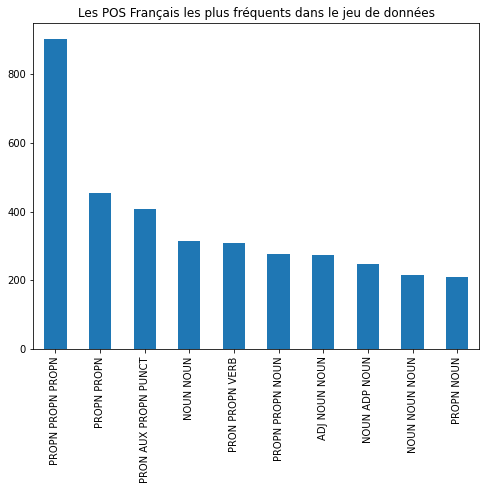

In [34]:
import matplotlib.pyplot as plt
# Tiltle of the figure
# plt.title('Les POS les plus fréquents dans le jeu de données');
# data = load_my_data()
fig, ax = plt.subplots()
ax.set_title('Les POS Français les plus fréquents dans le jeu de données')
trigram_querry_expressions_df['matched_en_POS'].value_counts()[:10].plot(ax=ax, kind='bar')

In [35]:
plt.rcParams['figure.figsize']=[8,6]
# Tiltle of the figure
plt.title('POS features' );
# sns.heatmap(pd.crosstab(mini_df['en_epl'], mini_df['en_epl']));
sns.heatmap(pd.crosstab(mini_df['matched_en_POS'], mini_df.en_epl));

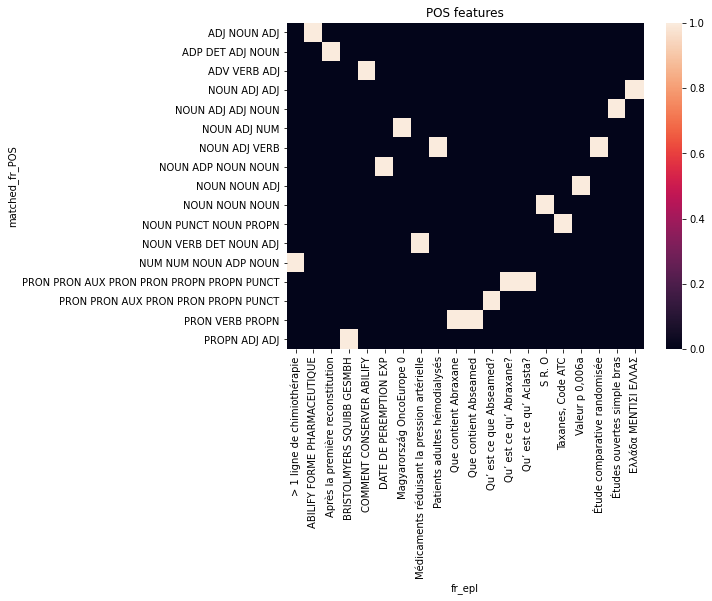

In [36]:
plt.rcParams['figure.figsize']=[8,6]
# Tiltle of the figure
plt.title('POS features' );
# sns.heatmap(pd.crosstab(mini_df['en_epl'], mini_df['en_epl']));
sns.heatmap(pd.crosstab(mini_df['matched_fr_POS'], mini_df.fr_epl));

<h6>The grammatical features of a expression in the trigrams</h6>

In [38]:
sen = nlp('17 PACKAGE LEAFLET')
word = sen[2]

for word in sen:
    print(f'{word.text:{12}} {word.pos_:{10}} {word.tag_:{8}} {spacy.explain(word.tag_)}')

17           NUM        CD       cardinal number
PACKAGE      PROPN      NNP      noun, proper singular
LEAFLET      NOUN       NN       noun, singular or mass


<h6> Create the dataset for the first model 10000 expressions<br>And for the second model 40000 expressions<br></h6>

In [39]:
# Split the dataset into (10000 samples train and test) 
from sklearn.model_selection import train_test_split
# Select 10000 expressions randomly 
first_model_dataset = df.sample(n=10100, random_state=42)
train, test = train_test_split(first_model_dataset, test_size = 0.10)
train.to_csv('first_model_train_corpus.csv', sep='\t', encoding='utf8', header=False, index=False)
test.to_csv('first_model_test_corpus.csv', sep='\t', encoding='utf8', header=False, index=False)

In [40]:
# Split the dataset into (10000 samples train and test) 
# Select 40000 expressions randomly 
first_model_dataset = df.sample(n=40000, random_state=42)
train, test = train_test_split(first_model_dataset, test_size = 0.10)
train.to_csv('SECOND_model_train_corpus.csv', sep='\t', encoding='utf8', header=False, index=False)
test.to_csv('SECOND_model_test_corpus.csv', sep='\t', encoding='utf8', header=False, index=False)